### Travis James Smith

For Problem 1, I'll submit the original notebook with the modified imports.

## Problem 2

In [203]:
%load_ext nb_black

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [204]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

<IPython.core.display.Javascript object>

In [205]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
print(partial_x_train.shape)

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
print(partial_y_train.shape)

(7982, 10000)
(7982, 46)


<IPython.core.display.Javascript object>

In [206]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

<IPython.core.display.Javascript object>

In [207]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

<IPython.core.display.Javascript object>

In [208]:
results = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 96us/step - loss: 2.6632 - accuracy: 0.4748 - val_loss: 1.7621 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.4542 - accuracy: 0.6873 - val_loss: 1.3255 - val_accuracy: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.0744 - accuracy: 0.7681 - val_loss: 1.1425 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8432 - accuracy: 0.8195 - val_loss: 1.0459 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.6722 - accuracy: 0.8601 - val_loss: 0.9741 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.5415 - accuracy: 0.8840 - val_loss: 0.9256 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.439

<IPython.core.display.Javascript object>

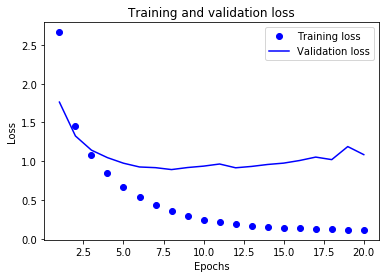

<IPython.core.display.Javascript object>

In [209]:
import matplotlib.pyplot as plt


def plot_results(results):
    loss = results.history["loss"]
    val_loss = results.history["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


plot_results(results)

In [210]:
val_loss = results.history["val_loss"]

for i, loss in enumerate(val_loss):
    print(f"Epoch {i} showed validation loss of: {loss}")

Epoch 0 showed validation loss of: 1.7621341562271118
Epoch 1 showed validation loss of: 1.325480128288269
Epoch 2 showed validation loss of: 1.1425304384231567
Epoch 3 showed validation loss of: 1.045907588005066
Epoch 4 showed validation loss of: 0.974147910118103
Epoch 5 showed validation loss of: 0.9255949015617371
Epoch 6 showed validation loss of: 0.9167661881446838
Epoch 7 showed validation loss of: 0.89211554479599
Epoch 8 showed validation loss of: 0.9183880319595337
Epoch 9 showed validation loss of: 0.9365399980545044
Epoch 10 showed validation loss of: 0.9639066581726075
Epoch 11 showed validation loss of: 0.9150689797401428
Epoch 12 showed validation loss of: 0.9327927122116089
Epoch 13 showed validation loss of: 0.9579173264503479
Epoch 14 showed validation loss of: 0.9753600997924805
Epoch 15 showed validation loss of: 1.0092193431854248
Epoch 16 showed validation loss of: 1.0530766868591308
Epoch 17 showed validation loss of: 1.0203821506500244
Epoch 18 showed validatio

<IPython.core.display.Javascript object>

In [211]:
optimal_epochs = np.argmin(val_loss)
print(f"The lowest validation error was found after {optimal_epochs} epochs.")

optimal_accuracy = results.history["accuracy"][optimal_epochs]
print(
    f"After {np.argmin(val_loss)} epochs the model has an accuracy of about {optimal_accuracy}."
)

The lowest validation error was found after 7 epochs.
After 7 epochs the model has an accuracy of about 0.9242044687271118.


<IPython.core.display.Javascript object>

## Problem 3

These are the recorded execution times for "Run All Above":
* Local machine: 15.4 seconds
* AWS EC2, 8-core CPU: 18.3 seconds

My local machine has the following specs:
* CPU: Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz, 3600 Mhz, 8 Core(s), 16 Logical Processor(s)
* GPU: NVIDIA GeForce RTX 2080 Ti


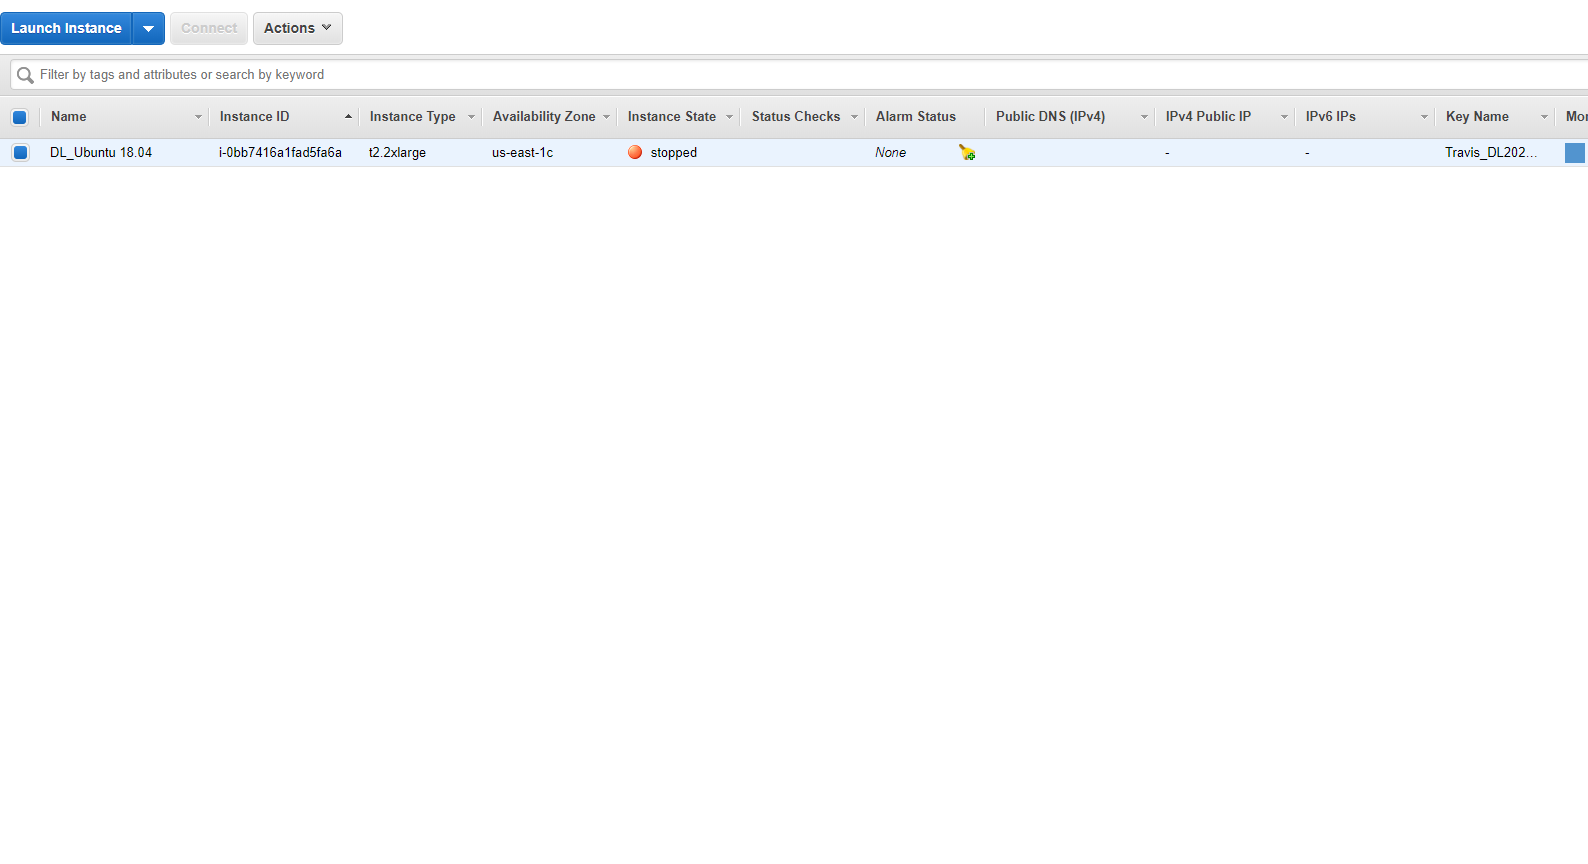

## Problem 4

In [212]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(46, activation="softmax"))
    model.compile(
        optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

<IPython.core.display.Javascript object>

In [213]:
k = 4
num_val_samples = len(x_train) // k
all_scores = []

for i in range(k):
    print("processing fold #", i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = one_hot_train_labels[i * num_val_samples : (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[: i * num_val_samples], x_train[(i + 1) * num_val_samples :]], axis=0,
    )
    partial_train_targets = np.concatenate(
        [
            one_hot_train_labels[: i * num_val_samples],
            one_hot_train_labels[(i + 1) * num_val_samples :],
        ],
        axis=0,
    )

    # Build the Keras model (already compiled)
    model = build_model()

    # Train the model (in silent mode, verbose=0)
    results = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=optimal_epochs,
        validation_data=(x_val, y_val),
    )

    all_scores.append(results.history["accuracy"][optimal_epochs - 1])

processing fold # 0
Train on 6737 samples, validate on 1000 samples
Epoch 1/7
6737/6737 [==============================] - 1s 195us/step - loss: 1.5512 - accuracy: 0.6601 - val_loss: 1.1280 - val_accuracy: 0.7470
Epoch 2/7
6737/6737 [==============================] - 1s 187us/step - loss: 0.8241 - accuracy: 0.8199 - val_loss: 0.9497 - val_accuracy: 0.8010
Epoch 3/7
6737/6737 [==============================] - 1s 188us/step - loss: 0.5061 - accuracy: 0.8924 - val_loss: 0.8824 - val_accuracy: 0.8200
Epoch 4/7
6737/6737 [==============================] - 1s 191us/step - loss: 0.3367 - accuracy: 0.9295 - val_loss: 0.9296 - val_accuracy: 0.8270
Epoch 5/7
6737/6737 [==============================] - 1s 212us/step - loss: 0.2534 - accuracy: 0.9460 - val_loss: 1.0526 - val_accuracy: 0.8140
Epoch 6/7
6737/6737 [==============================] - 2s 254us/step - loss: 0.2071 - accuracy: 0.9516 - val_loss: 1.1308 - val_accuracy: 0.8070
Epoch 7/7
6737/6737 [==============================] - 2s 276u

<IPython.core.display.Javascript object>

In [214]:
k_fold_acc = np.mean(all_scores)
print(
    f"Our k-fold approach has an accuracy of about {k_fold_acc}, versus {optimal_accuracy} previously."
)

Our k-fold approach has an accuracy of about 0.9588837623596191, versus 0.9242044687271118 previously.


<IPython.core.display.Javascript object>

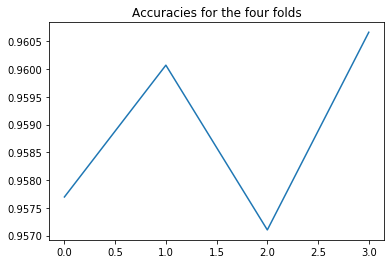

<IPython.core.display.Javascript object>

In [215]:
plt.plot(range(4), all_scores)
plt.title("Accuracies for the four folds")
plt.show()

## Problem 5

In [216]:
from keras import regularizers


def build_l2_model(lam):
    l2_model = models.Sequential()
    l2_model.add(
        layers.Dense(
            64,
            kernel_regularizer=regularizers.l2(lam),
            activation="relu",
            input_shape=(10000,),
        )
    )
    l2_model.add(
        layers.Dense(64, kernel_regularizer=regularizers.l2(lam), activation="relu")
    )
    l2_model.add(layers.Dense(46, activation="softmax"))
    l2_model.compile(
        optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return l2_model

<IPython.core.display.Javascript object>

In [217]:
lambdas = [0.001, 0.005, 0.0005]
results_arr = []

for lam in lambdas:
    l2_model = build_l2_model(lam)
    results = l2_model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val)
    )
    results_arr.append(results)


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 92us/step - loss: 2.9462 - accuracy: 0.5122 - val_loss: 1.9978 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.6579 - accuracy: 0.6894 - val_loss: 1.4767 - val_accuracy: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.2780 - accuracy: 0.7590 - val_loss: 1.3073 - val_accuracy: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.0851 - accuracy: 0.8076 - val_loss: 1.2400 - val_accuracy: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.9531 - accuracy: 0.8368 - val_loss: 1.1749 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.8573 - accuracy: 0.8597 - val_loss: 1.1450 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.778

7982/7982 [==============================] - 1s 79us/step - loss: 0.3431 - accuracy: 0.9521 - val_loss: 1.0047 - val_accuracy: 0.8150
Epoch 17/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.3411 - accuracy: 0.9524 - val_loss: 1.0180 - val_accuracy: 0.8130
Epoch 18/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.3273 - accuracy: 0.9538 - val_loss: 1.0277 - val_accuracy: 0.8090
Epoch 19/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.3243 - accuracy: 0.9539 - val_loss: 1.0182 - val_accuracy: 0.8160
Epoch 20/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.3143 - accuracy: 0.9540 - val_loss: 1.0546 - val_accuracy: 0.8170


<IPython.core.display.Javascript object>

--------------------------------------
Results for lambda=0.001
The lowest validation error was found after 18 epochs.
After 18 epochs the model has an accuracy of about 0.948509156703949.


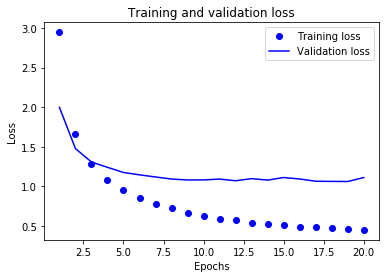

--------------------------------------
Results for lambda=0.005
The lowest validation error was found after 19 epochs.
After 19 epochs the model has an accuracy of about 0.8778501749038696.


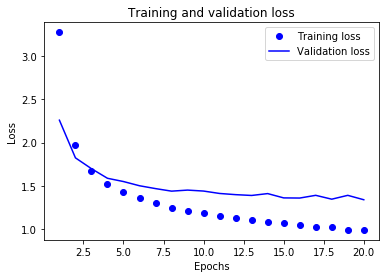

--------------------------------------
Results for lambda=0.0005
The lowest validation error was found after 15 epochs.
After 15 epochs the model has an accuracy of about 0.9521422982215881.


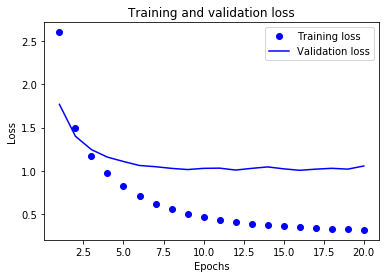

<IPython.core.display.Javascript object>

In [218]:
optimal_epoch_arr = []

for i, results in enumerate(results_arr):
    print("--------------------------------------")
    print(f"Results for lambda={lambdas[i]}")

    val_loss = results.history["val_loss"]
    optimal_epochs = np.argmin(val_loss)
    optimal_epoch_arr.append(optimal_epochs)
    print(f"The lowest validation error was found after {optimal_epochs} epochs.")

    optimal_accuracy = results.history["accuracy"][optimal_epochs]
    print(
        f"After {np.argmin(val_loss)} epochs the model has an accuracy of about {optimal_accuracy}."
    )

    plot_results(results)

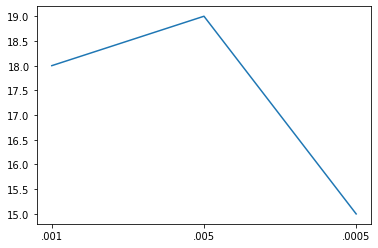

<IPython.core.display.Javascript object>

In [219]:
plt.plot([".001", ".005", ".0005"], optimal_epoch_arr)